### MNIST DEMO

The code chunks below go through's the process of training a neural network with tensor flow. The comments outline each step of the process in great detail.


In [1]:
# if you get this error: ModuleNotFoundError: No module named 'distutils'
#!pip install setuptools

# initial tensor flow set 
#!pip install tensorflow 

# install if you incase you plan on not need GPU support
#pip install tensorflow-cpu

In [1]:
# Future is used to bridge the gap between different versions of python.
# However, I am running python 3 so I will not need use this part of the code 
#from __future__ import absolute_import, division, print_function

# used for building 
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

# This code is necessary to bring in all of the public TensorFlow interface
tf.compat.v1.enable_eager_execution()

In [3]:
# MNIST dataset parameters. 
# MNIST dataset is a large database of hand written digits. This is commonly used for training and testing machine learning models

# What are the classes? 

## The classes indicate the total number of distinct classes in the dataset.
## 10 is specific to this data set if you want to increase then you will need to choose a new dataset
num_classes = 10 


#What are the features?

## The features represent the number of features in each image of the data set. Each image is a 28x28 pixel grayscale image, 
## when the image is flattened into a single array it will have 28*28 = 784 features. It corresponds to the intensity of
## each pixel, ranging from 0 (white) to 255 (black).
## This number is also specific to the MNIST dataset and cannot be changed. 
num_features = 784

In [4]:
# What are each of these parameters?

## Learning rate is the hyperparameter that controls the rate at which the model is changed, given the estimated error when the model's weights are updated.
learning_rate = 0.1

## Training steps specifies the total number of training iterations.
training_steps = 2000

## In each training step a batch of data is fed into the model for processing. The batch size will determine the amount of 
## data samplers included in each step to compute the gradient and update the model
batch_size = 256

## Display step is used for logging results. It's used for monitor training progress and performance metrics.
## In this case the information will be printed every 100 training steps. 
display_step = 100

In [5]:
# What do these have to do with the neural network?

## The hidden layers below specify the number of neurons (or units) in the first and second layers of neural network.
## Each neuron will receive input from all the neurons in the previous layer. It will process the input through a weighted
## sum followed by an activation function, and then pass the output to the next layer. 

## The 'n_hidden_1' is the first layer input layer and contains 128 neurons. 
n_hidden_1 = 128

## The second layer specifies 256 neurons. Each of these neurons will receive an input from all 128 neurons in the first layer and then forward the output to the next layer. 
## Since there are only two layers this is the output layer. However, if there by adding more layers it can pass one its neurons to subsequent layers. 
n_hidden_2 = 256

In [6]:
# What is this block of code doing?

## This block of code is used to prepare the MNIST dataset for training.
## 1) The MNIST dataset is loaded in, then the data is divided into ('x_train' and 'y_train') and ('x_test' and 'y_test').
## 2) The next step converts both the testing and training sets into floats. It is necessary to do this when performing numerical operation during training.
## 3) The image is flattened. This step is required because the input layer of many neural networks expect a single vector
## of features for each sample, rather than a 2D array.
## 4) Lastly the image is normalized. The pixel values of the image (which range from 0 to 255) are normalized to fall with in the range of [0,1]. 
## This is a common step that improves the convergence of training by scaling the input features to similar range. 

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [7]:
# Print out the number of rows and number of columns
print('Rows: %d, columns: %d' % (x_train.shape[0], x_train.shape[1]))

Rows: 60000, columns: 784


In [7]:
# Another print, but why is the output different than the previous print?

## The reason the numbers are different is because the data was split between test and train. 
## The previous block was the train dataset and the code in this block represents the test data set

print('Rows: %d, columns: %d' % (x_test.shape[0], x_test.shape[1]))

Rows: 10000, columns: 784


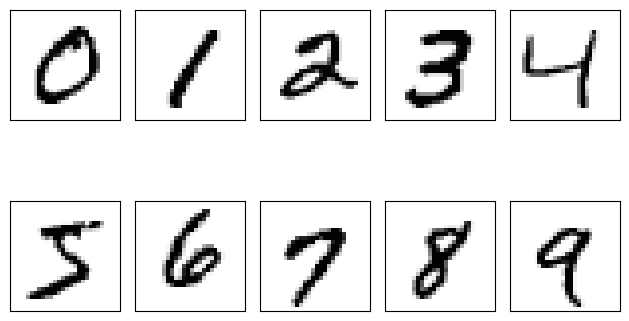

In [9]:
# This block of code displays the different options of the data (the digits)
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

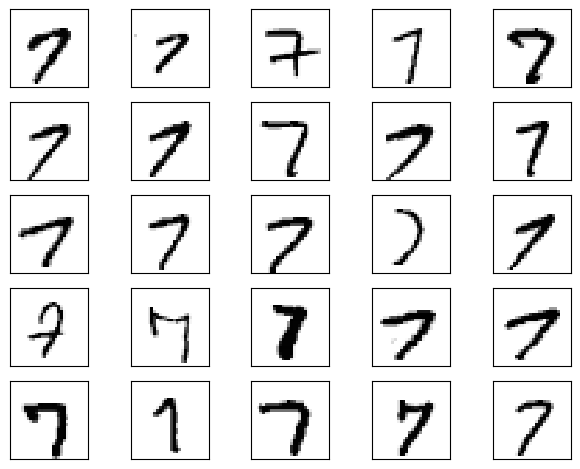

In [10]:
# Another block of code to display some data, but how does it differ than the previous block of code?

## The first block goes through digits 0 - 9. While the second specifically focuses on the digit 7. It then gives 25 versions of the number. 

ig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = x_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [11]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# What is getting shuffled and batched, and why batch them?

## The x_train and y_train data is getting shuffled and batched. 
## The shuffling ensures that the data is presented in a random order. Shuffling helps to improve the model's generalization 
## ability by making sure the batches of data it trains on have a varied distribution of classes. 
## Shuffling also mitigates risk associated with learning not genuine patterns that could arise form the sequence rather than the content of the data

## Instead of updating the model's weights after each single example, batching them allows the model to update weights after processing each batch of data. 
## By organizing the data into smaller groups it helps the neural network learn better as it gets a variety of examples in each batch. 
## Batching can help with balancing the computers workload so it can handle the data more efficiently. 

train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [12]:
# This is a Python block of code. Basically what is it doing?

## The python code is basically creating a simple neural network. 
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

In [13]:
# Another Python thing but what is it actually doing?

## This is creating a blueprint of a neural network model by setting up the architecture with the specified layers and activations and preparing it for further use.
neural_net = NeuralNet()

In [14]:
# A function to perform cross entropy loss using functions from tensorflow
# How will this function be used?

## The function calculates the cross-entropy loss between the models predictions ('x') and the true labels ('y'). 
## This is a typical step used during the training of a neural network to measure the performance of the model. 
## Specifically how well the model's predictions match the true labels. 

def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64) # Convert labels to int 64 for tf cross-entropy function.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

In [15]:
# A function for accuracy
# But what do we mean by accuracy? Accuracy of what?

## We are looking at the accuracy of the predictions made by the model. Specifically how often the model can correctly predict the class labels when given inputs. 

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

In [16]:
# Is this line of code needed? If so, why?

## Yes this code is needed because the optimizer is a crucial component when training a neural network. It's responsible for adjusting 
## the model's weights based on the gradients of the loss function with respect to those weights, aiming to minimize loss. 

optimizer = tf.keras.optimizers.SGD(learning_rate)

In [17]:
# In summary, what is this function doing?

## The code below is performing a single step of training for the neural network. 'run_optimization' executes a training step where it calculates 
## how the networks predictions differ from teh actual values, it also determines how to adjust the networks parameters to reduce this error,
## then it updates the parameters to improve the model.

def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        
    trainable_variables = neural_net.trainable_variables

    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [18]:
# The run_optimization() function is run in a for_loop - what is that accomplishing?

## The for loop is optimizing the neural networks parameters (weights and biases) by iteratively processing small subsets of the data (mini-batches),
## calculating how wrong the model's predictions are, and making adjustments to reduce the error. 
## It also prints out the loss and accuracy of the data to ensure the model is learning effectively. 

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 0.361992, accuracy: 0.894531
step: 200, loss: 0.299880, accuracy: 0.921875
step: 300, loss: 0.301292, accuracy: 0.914062
step: 400, loss: 0.220568, accuracy: 0.925781
step: 500, loss: 0.308668, accuracy: 0.921875
step: 600, loss: 0.213078, accuracy: 0.953125
step: 700, loss: 0.153674, accuracy: 0.960938
step: 800, loss: 0.193044, accuracy: 0.941406
step: 900, loss: 0.226572, accuracy: 0.933594
step: 1000, loss: 0.150668, accuracy: 0.976562
step: 1100, loss: 0.149307, accuracy: 0.960938
step: 1200, loss: 0.112287, accuracy: 0.972656
step: 1300, loss: 0.121058, accuracy: 0.972656
step: 1400, loss: 0.085633, accuracy: 0.976562
step: 1500, loss: 0.116870, accuracy: 0.972656
step: 1600, loss: 0.098713, accuracy: 0.968750
step: 1700, loss: 0.068089, accuracy: 0.988281
step: 1800, loss: 0.106490, accuracy: 0.976562
step: 1900, loss: 0.099055, accuracy: 0.968750
step: 2000, loss: 0.072795, accuracy: 0.988281


In [20]:
# The testing data is used here, but what is it being used to do?

## The testing data is being used to evaluate the trained neural network model's performance
## on a dataset it hasn't seen during training. This is a very important step for assessing the model's 
## generalization ability and how well it can apply what it has been exposed to new, unseen data. 

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.962700
